# Homework #1
## Introduction to supervised learning 

This colaboratory contains Homework #1 of the Machine Learning course, which is due **September 18, Sunday, midnight (23:59 EET time)**. To complete the homework, extract **(File -> Download .ipynb)** and submit to the course webpage.

**NB! Links to your colaboratory will not be accepted as a solution!**

## Submission's rules:

1. Please, submit only .ipynb that you extract from the Colaboratory.
2. Run your homework exercises before submitting (output should be present, preferably restart the kernel and press run all the cells).
3. Do not change the description of tasks in red (even if there is a typo|mistake|etc).
4. Please, make sure to avoid unnecessary long printouts.
5. Each task should be solved right under the question of the task and not elsewhere.
6. Solutions to both regular and bonus exercises should be submitted in one IPYNB file.

Please, steer clear of copying someone else's work. If you discuss assignments with anyone in the course, please, mention their names here:
1. Pooh

##List of Homework's exercises:
1. [EX1](#scrollTo=tz9XASPxeqDC) - 4 points
2. [EX2](#scrollTo=BGVGqZGpxmzQ&uniqifier=1#) - 2 points
4. [EX3](#scrollTo=7p4GMeGK-QGL&uniqifier=1) - 1 points
5. [EX4](#scrollTo=nqV2c5sDc_f2&uniqifier=1) - 3 points
6. [Bonus 1](#scrollTo=_2T9ydozzcb-&uniqifier=1) - 2 points
7. [Bonus 2](#scrollTo=UkOtofaRjH8P&uniqifier=1) - up to 5 points

### Homework setup: 
Here we will load necessary libraries (NumPy and Pandas) and MNIST dataset 

In [1]:
import numpy as np # for matrix stuff
import pandas as pd # to work with datasets
import matplotlib.pyplot as plt # subjectively ugly plotting here
from seaborn import countplot # a bit less ugly plotting

# Getting MNIST one more time
from tensorflow.keras.datasets import mnist
(images, labels),(_, _) = mnist.load_data()
images = images / 255 # normalising images

print(f"images are of shape: {images.shape} and labels: {labels.shape}")

# Subsample the images
train_images = images[:2000]
train_labels = labels[:2000]

test_images = images[2000:3000]
test_labels = labels[2000:3000]

images are of shape: (60000, 28, 28) and labels: (60000,)


## Homework exercise 1 (4 points): KNN
One very popular variation of Nearest Neighbour is K-nearest neighbour. In this algorithm a label for a new instance is chosen by majority vote by **`k`** of its nearest neighbors. 

The actual algorithm is not very different from vanila nearest neighbour:

1. Compute distances to all points in the dataset
2. Find the **`k`** closest points (you may consider using `np.argsort` function)
3. Report the most popular label from these **`k`**. (maybe `np.bincount` can help)

<font color='red'>**(Homework exercise 1- a)** Implement the aformentioned algorithm in the cell below (2.0 points)</font>

In [2]:
def dist(img1, img2):
  ##### YOUR CODE STARTS #####
  return np.sqrt(np.sum((img1 - img2)**2))
  ##### YOUR CODE ENDS ##### 

def classify_knn(image, k):
  ##### YOUR CODE STARTS #####
  all_distances = [dist(image, train_image) for train_image in train_images]
  closest_k = [train_labels[label_index] for label_index in np.argsort(all_distances)[:k]]
  #print(closest_k) # (ex 1 - b) labels of K nearest labels.
  prediction =  max(closest_k, key=closest_k.count)
  ##### YOUR CODE ENDS ##### 
  return prediction

Test the function on an unseen `test_image`:

In [3]:
# Get the test image
test_image = test_images[0] # in the class we used test_images[1]
test_label = test_labels[0]
print(f"Predicted class for the first image is {classify_knn(test_image, 10)} and the true label is {test_label}")

Predicted class for the first image is 6 and the true label is 5


<font color='red'>**(Homework exercise 1- b)** Modify the function `classify_knn` adding a print statement that outputs labels of K nearest neighbours. Report 10 labels of the nearest neighbours for the `test_image`. Why do you think these digits were among the closest neighbours? (1.0 point) </font>

Answer to (b): <font color='blue'>Nearest neighbours for the test_image are 6, 6, 5, 9, 6, 6, 9, 5, 9, 6. It's not obvious at a glance that these images are actually the 10 closest neighbours of the test_image. I would have guessed that it could be wrongly classified as 9. But I suppose the distances of pixel values must be rather similar since it was near such a group.</font>

<font color='red'>**(Homework exercise 1- c)** Classify all test images and store them into a separate variable `test_predicted`, choose `k` = 5. Compute accuracy of your KNN model. **NB, don't forget to comment out all print statements inside the function!** (1.0 point) </font>

In [4]:
##### YOUR CODE STARTS #####
test_predicted = np.array([classify_knn(img, 5) for img in test_images])
n_correct = np.sum(test_predicted == test_labels)
knn_accuracy = f"{n_correct / 10}%"
##### YOUR CODE ENDS ##### 
print(f"Final accuracy of our nearest neighbor classifier is {knn_accuracy}. Not bad!")

Final accuracy of our nearest neighbor classifier is 91.7%. Not bad!


## Homework exercise 2 (2 points): exploring misclassified examples
<font color='red'>**(Homework exercise 2- a)** Modify the visualisation code that we used during the practice session to visualise a grid of example images from different classes. Now, instead of random examples from each class, visualise misclassified examples from each class. For example, in the first column visualise images that had true label `0` but were classified as something else, in the second column, show examples of images that had label `1` but were misclassified into another class and so on. Add a title to each small image, in the following format `true_label, predicted_label` e.g. "0, 6" - image of class 0 was classified as 6. (1.5 points)

**NB! you need a variable `test_predicted` to exist from the previous exercise to complete this exericse.** </font>

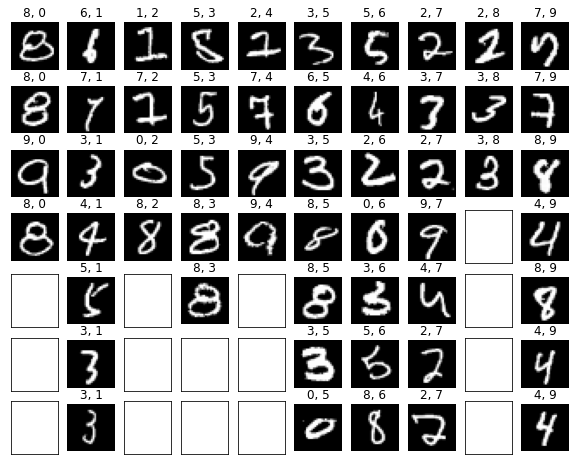

In [5]:
num_classes = 10
samples_per_class = 7 # Number of images from each class we want to see
fig, axs = plt.subplots(samples_per_class, num_classes, figsize=(10.0, 8.0))
for i in range(num_classes):
    ##### YOUR CODE STARTS #####
    # select ids of images that correspond to given class
    idxs = np.flatnonzero((test_predicted == i) & (test_predicted != test_labels))
    #print(f"class {i} has {len(idxs)} misclassified values")
    # visualise
    for j, index in enumerate(idxs[:samples_per_class]):
        axs[j, i].imshow(test_images[index], cmap='gray')
        axs[j, i].set_title(f"{test_labels[index]}, {test_predicted[index]}")
        axs[j, i].axis('off')
    ##### YOUR CODE ENDS ##### 
plt.setp(axs,xticks=[],yticks=[]) # set all axes off
plt.show()

<font color='red'>**(Homework exercise 2- b)** Take a careful look at the resulting figure. Are all classes equally missclassified? Why? Are there any classes that KNN confuses more often, why? (0.5 points) </font>

Answer to (b): <font color='blue'>Classes certainly aren't equally misclassified. Numbers 0, 2, 3, 4, 8 seems to be misclassified fewer times and numbers 1, 5, 6, 7, 9 seem to be misclassified more often. This inequality is caused by some representations of numbers being rather similar. Similar looking numbers will be misclassified more often than those with a unique look.</font>

<font color='blue'>For example, number 1 gets misclassified because it's represented as just a straight line in most cases and so it overlaps with many pixel values of other numbers, therefore possibly ending up in a wrong group.</font>

## Preparation for homework exercises 3 and 4
Next we will work with real-world dataset collected from taxis operating in New York City

In [6]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

link = 'https://drive.google.com/file/d/1XKhfq4WFHlTrvag48cD3VDJGfykYUJ-s' # The shareable link

In [7]:
downloaded = drive.CreateFile({'id':'1XKhfq4WFHlTrvag48cD3VDJGfykYUJ-s'}) 
downloaded.GetContentFile('nyc_data_2.zip')

# After archive has been downloaded
# unzip it
!unzip nyc_data_2.zip

Archive:  nyc_data_2.zip
replace train_2M.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


* `train_2M.csv` contains 2 million observations from NYC dataset (6 independent variables and fare_amount that we need to predict).
* `test.csv` contains new observations, for which we have to estimate `fare_amount` based on train data.
* `sample_submission.csv` - a sample submission file in the correct format (columns `key` and `fare_amount`). Every row in this file matches every row in `test.csv`.
* `model.pickle` - file that contains trained model saved as a pickle (we are going to deal with it later)

## Homework exercise 3 (1 point): read and explore `model.pickle`

<font color='red'> **(Homework exercise 3- a)** read in `model.pickle` file that you have downloaded from `nyc_data_2.zip` using `pickle.load()` function. (0.5 points)

In [8]:
import pickle
import os

##### YOUR CODE STARTS #####
filename = "model.pickle"
with open(filename, 'rb') as file:
  lr = pickle.load(file)

print("Model:", lr)
print("Coefficents:",*[f"{x:_}" for x in lr.coef_[0] ])
print("Features:",*lr.feature_names_in_)
##### YOUR CODE ENDS ##### 

Model: LinearRegression()
Coefficents: 146.11142713372152 89.25911080575094 0.0523209145402177
Features: abs_diff_longitude abs_diff_latitude passenger_count


<font color='red'> **(Homework exercise 3- b)** next, explore the object using function `dir` and answer the following questions:
* <font color='red'> Which model was saved into this object?  
* <font color='red'> How many coefficients it has and what are their values?
* <font color='red'>Can you find out which features have been used for training?

<font color='red'>(0.5 points)


Answers to (b): 

<font color='blue'>1) LinearRegression model was saved into this object. </font>

<font color='blue'>2) It has 3 coefficients with values: 146.11142713372152, 89.25911080575094 and 0.0523209145402177. </font>

<font color='blue'>3) Features used for training were: abs_diff_longitude, abs_diff_latitude and passenger_count.</font>



### Setting up Kaggle

You need to have an account on Kaggle.com, before you proceed to the last exercise. When in your account, you need to download your API Token from kaggle. It's very easy:
1. Click on your profile icon
2. Go to **Account**
3. In **API** you press **Create new API token**

Now we load the file **kaggle.json** that you have downloaded, into this notebook:

In [9]:
from google.colab import files

files.upload(); #kaggle.json

Saving kaggle.json to kaggle.json


The next cell moves the file into a separate folder, sets secure access for it and configures your Kaggle profile for this notebook.

In [10]:
import json

!mkdir /root/.kaggle/
!mv kaggle.json /root/.kaggle/kaggle.json
!chmod 600 ~/.kaggle/kaggle.json
!kaggle config set -n path -v{/content}

mkdir: cannot create directory ‘/root/.kaggle/’: File exists
- path is now set to: {/content}


In order to sign up for a NYC Taxi competition you need to accept the rules by cliking on "Late submission" button in the upper right corner: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction

Make a test submission to ensure that the submission mechanism works

In [11]:
!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f sample_submission.csv -m "Sample submission test"

100% 335k/335k [00:02<00:00, 123kB/s]
Successfully submitted to New York City Taxi Fare Prediction

Now you can check `My submissions` tab on the website: https://www.kaggle.com/c/new-york-city-taxi-fare-prediction/submissions

## Read in the NYC data and perform basic preprocessing

In [12]:
%%time 

# note that we use only 1M out of 2M records
train =  pd.read_csv('train_2M.csv', parse_dates=["pickup_datetime"], nrows = 1_000_000) # the first row will automatically be interpreted as a header

# functions that add two new features abs_diff_longitude and abs_diff_latitude
def add_travel_vector_features(df):
    df['abs_diff_longitude'] = (df.dropoff_longitude - df.pickup_longitude).abs()
    df['abs_diff_latitude'] = (df.dropoff_latitude - df.pickup_latitude).abs()

# adding two new features to train
add_travel_vector_features(train)

# reading in test and adding two new features to test
test = pd.read_csv('test.csv')
add_travel_vector_features(test)

# removing not available values and outliers
train = train.dropna(how = 'any', axis = 'rows')
train = train[(train.abs_diff_longitude < 5.0) & (train.abs_diff_latitude < 5.0)]

CPU times: user 1.62 s, sys: 107 ms, total: 1.72 s
Wall time: 1.9 s


## Homework exercise 4 (3 points): K-fold cross-validation algorithm
<font color='red'> In the classroom we were cheating on our validation data when we hand-picked the number of decision trees in the previous example (as we used validation data multiple times). The honest and better way of finding a good hyperparameter (depth of the tree) is a **K-fold cross-validation algorithm**.


<font color='red'> **(Homework exercise 4- a)** Implement the K-fold cross-validation algorithm using lecture slides and hints in comments. (2.5 points) </font>

In [13]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

max_depths = [1, 2, 5, 8, 9, 10, 11, 12, 13, 15, 20]

# 4-fold cross validation
for param in max_depths:
  print(f'Calculating RMSE for tree with a depth {param}...')
  ##### YOUR CODE STARTS #####
  # number of folds
  n_folds = 4

  # create a vector of fold indices 
  # with length of this vector equal to number of rows in training data
  # you can use np.concatenate and np.repeat functions
  folds_indx = np.concatenate([np.repeat(i, len(train) // n_folds + (1 if len(train) % n_folds > i else 0)) for i in range(n_folds)])
  # for dataset with 8 entries you should get:
  # the following vector[0, 0, 1, 1, 2, 2, 3, 3]
  # chunks can be unequal if the number of rows is not divisible by 4

  # randomly shuffle the obtained indices
  np.random.shuffle(folds_indx)

  # initialise variable that will hold RMSEs for each fold
  fold_RMSEs = np.zeros(n_folds)
  for fold_indx in np.arange(n_folds):
    
    # split data into train_X, train_y and val_X, val_y depending on the fold
    # use previously generated folds_indx to fetch the right rows
    train_X = train.iloc[[i for i, x in enumerate(folds_indx) if x != fold_indx], :] [['abs_diff_longitude', 'abs_diff_latitude', 'passenger_count']]
    train_y = train.iloc[[i for i, x in enumerate(folds_indx) if x != fold_indx], :] [['fare_amount']]
    val_X = train.iloc[[i for i, x in enumerate(folds_indx) if x == fold_indx], :] [['abs_diff_longitude', 'abs_diff_latitude', 'passenger_count']]
    val_y = train.iloc[[i for i, x in enumerate(folds_indx) if x == fold_indx], :] [['fare_amount']]

    # train the decision tree with max_depth = param
    dtr = DecisionTreeRegressor(max_depth = param)

    # fit the decision tree on training data
    dtr.fit(train_X, train_y)
    # predict validation data
    val_predictions = dtr.predict(val_X)
    
    # calculate RMSE for this fold
    fold_RMSEs[fold_indx] = mean_squared_error(val_y, val_predictions, squared=False)
    ##### YOUR CODE ENDS ##### 

  print(f'Average validation RMSE for {param} of trees is {np.mean(fold_RMSEs)}')


Calculating RMSE for tree with a depth 1...
Average validation RMSE for 1 of trees is 51.63998238767708
Calculating RMSE for tree with a depth 2...
Average validation RMSE for 2 of trees is 36.37003053147969
Calculating RMSE for tree with a depth 5...
Average validation RMSE for 5 of trees is 27.64261042719646
Calculating RMSE for tree with a depth 8...
Average validation RMSE for 8 of trees is 25.274421821348803
Calculating RMSE for tree with a depth 9...
Average validation RMSE for 9 of trees is 25.643013492749137
Calculating RMSE for tree with a depth 10...
Average validation RMSE for 10 of trees is 26.6504537041467
Calculating RMSE for tree with a depth 11...
Average validation RMSE for 11 of trees is 26.124762374068602
Calculating RMSE for tree with a depth 12...
Average validation RMSE for 12 of trees is 26.409751312250208
Calculating RMSE for tree with a depth 13...
Average validation RMSE for 13 of trees is 26.96580984293726
Calculating RMSE for tree with a depth 15...
Average 

<font color='red'> **(Homework exercise 4- b)** Based on above results train the `DecisionTreeRegressor` on the entire training data with new, more optimal number of trees. Predict the test set and submit the results to Kaggle. Check your results online and print out your new leaderboard score, which should be smaller than 4.02083. (0.5 points) </font>

In [14]:
##### YOUR CODE STARTS #####
dtr = DecisionTreeRegressor(max_depth = 9)
dtr.fit(train[['abs_diff_longitude', 'abs_diff_latitude']], train[['fare_amount']])
test_y_predictions = dtr.predict(test[['abs_diff_longitude', 'abs_diff_latitude']])

submission = pd.DataFrame(
    {'key': test.key, 'fare_amount': test_y_predictions},
    columns = ['key', 'fare_amount'])
submission.to_csv('submission_dt.csv', index = False)

!kaggle competitions submit -c new-york-city-taxi-fare-prediction -f submission_dt.csv -m "Decision Tree Regressor using 1M records and max_depth = 9"

# just copy paste your new score below:
print(f"My new score is {4.00167}")
##### YOUR CODE ENDS ##### 

100% 453k/453k [00:02<00:00, 179kB/s]
Successfully submitted to New York City Taxi Fare PredictionMy new score is 4.00167


# Bonus exercises
**NB, these are optional exercises! These will be graded more strictly, hence you really need to impress with high quality of the solution to earn points.** 

## Bonus exercise 1 (2 bonus points):

<font color='red'> Visualising misclassified examples can help to debug the classification algorithm. But misclassified examples may have different probabilities. In this bonus exercise (optional) try modifying code we have written for the homework exercise 2 so that title now would include probability of a true class and of a wrong class. You would probably need to change the code of `classify_knn` function. Describe the results. </font> 

## Bonus exercise 2 (up to 5 points): the grand challenge
<font color='red'> Try to get into top 300 places on public leaderboard (RMSE < 3.04) using different ML algorithms with different parameters, more features, more data, better preprocessing. Here are some ideas for improvement:
* Use more data (we only took 1M out of 2M, there are 53M more on the website)
* Do more preprocessing (remember negative prices or unrealistic numbers of passengers?)
* Use more/better features (e.g. euclidean distance, or google what is haversine distance)
* Use some other regression algorithm (e.g. look into RandomForestRegressor from sklearn.ensemble)
* Tune parameters of these algorithms
* Try something else!
</font> 

<font color='red'>You should make a small post here with code and elaborate explanations of what you have tried (do it even you did not manage to break into top 300). **Report your final leaderboard rank**. Number of points would depend on quality of your explanations and the resulting rank.</font> 


In [15]:
# Hint:
R = 6378

def haversine_distance(lon1, lon2, lat1, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    
    
    source: https://stackoverflow.com/a/29546836

    """
    # Convert latitude and longitude to radians
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    # Find the differences
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Apply the formula 
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    # Calculate the angle (in radians)
    c = 2 * np.arcsin(np.sqrt(a))
    # Convert to kilometers
    km = R * c
    
    return km

# Comments (optional feedback to the course instructors)
Here, please, leave your comments regarding the homework, possibly answering the following questions: 
* how much time did you spend on this homework?
* was it too hard/easy for you?
* what would you suggest to add or remove?
* anything else you would like to tell us

Your comments:

# <font color='red'>  End of the homework. Please don't delete this cell.</font>